**Data Set Information**:

Features are computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information:

 1. ID number
 2. Diagnosis (M = malignant, B = benign)

3.-32.

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)


In [9]:
# read the data
import pandas as pd 

WisconsinCancer = 'https://assets.datacamp.com/production/course_6430/datasets/WisconsinCancer.csv'
# Load DataFrame from file_path: ioc_codes
WisconsinCancer = pd.read_csv(WisconsinCancer,  index_col ="id")
display(WisconsinCancer.tail())
WisconsinCancer.shape

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


(569, 32)

In [10]:
wisc_data = WisconsinCancer.iloc[:,1:30] # numerical variables 
wisc_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [25]:
wisc_data.shape

(569, 29)

In [13]:
diagnosis = (WisconsinCancer.diagnosis == 'M')
sum(diagnosis)

212

# PCA 

**Execute PCA**

- PCA = "Principal Component Analysis"
- Fundamental dimension reduction technique
- First step "decorrelation" 
- Second step reduces dimension 


In [26]:
# Import PCA
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(wisc_data)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

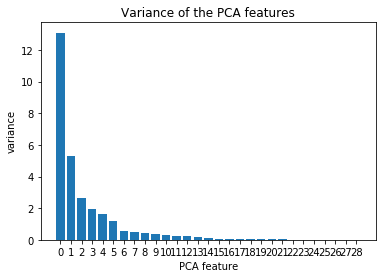

In [34]:
# Plot the explained variances
features = range(pca.n_components_)
pr_var = pca.explained_variance_

plt.bar(features,pr_var)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.title('Variance of the PCA features')
plt.xticks(features)
plt.show()

In [50]:
wisc_data_scaled = scaler.transform(wisc_data)

In [52]:
pca_features = pca.transform(wisc_data_scaled)
pca_features.shape

(569, 29)

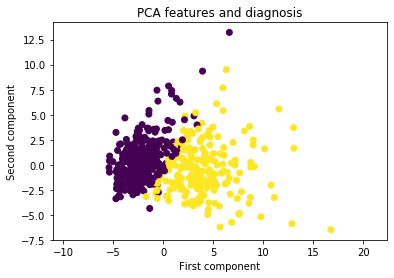

In [62]:
C1 = pca_features[:,0]
C2 = pca_features[:,1]

plt.scatter(C1, C2, c=diagnosis)
plt.axis('equal')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA features and diagnosis')
plt.show()

In [66]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(C1, C2)

# Display the correlation
print(correlation)         
# zero correlation 

-2.498001805406602e-16


# K means 

`n_clusters`: number of clusters to form and number of centroids to generate
`init`: method for initialization
- `k-means++`: K-Means++ [default]
- `random`: K-Means

`random_state`: the seed used by the random number generator [optional]

In [67]:
# Import KMeans
# Import pyplot
from sklearn.cluster import KMeans 

# Create a KMeans instance with 3 clusters: model
k_means = KMeans(n_clusters=4)

# we take the first 7 components 
wisc_pr = pca_features[:,0:6]

# Fit model to points
k_means.fit(wisc_pr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
# Determine the cluster labels of new_points: labels
labels = k_means.predict(wisc_pr)

# Print cluster labels of new_points
print(labels)

In [71]:
# Create a DataFrame with labels and varieties as columns: df
results_kmeans = pd.DataFrame({'labels': labels, 'diagnosis': diagnosis})

# Create crosstab: ct
pd.crosstab(results_kmeans['labels'], results_kmeans['diagnosis'])

diagnosis,False,True
labels,,
0,319,20
1,37,35
2,1,116
3,0,41


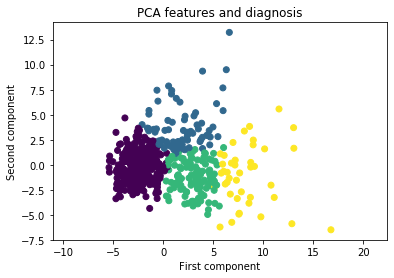

In [72]:
C1 = pca_features[:,0]
C2 = pca_features[:,1]

plt.scatter(C1, C2, c=results_kmeans['labels'])
plt.axis('equal')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA features and diagnosis')
plt.show()

Build a pipeline to standardize and cluster the data.

`Normalizer()` is different to `StandardScaler()`, which was used before. While `StandardScaler()` standardizes features by removing the mean and scaling to unit variance, `Normalizer()` rescales each observation.

In [88]:
# what if we use normalizer instead of scaler 

# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

pca_n7 = PCA(n_components=7)

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=4)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, pca_n7, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(wisc_data)

labels_pip = pipeline.predict(wisc_data)

In [89]:
pca_pip_features = pca_n7.transform(wisc_data)
pca_pip_features.shape
C1_pip = pca_pip_features[:,0]
C2_pip = pca_pip_features[:,1]

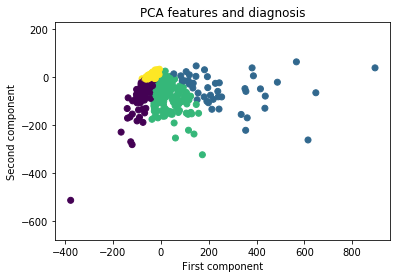

In [90]:
plt.scatter(C1_pip, C2_pip, c=labels_pip)
plt.axis('equal')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA features and diagnosis')
plt.show()

# Hierarchical clustering




In [108]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(wisc_data, method='complete')

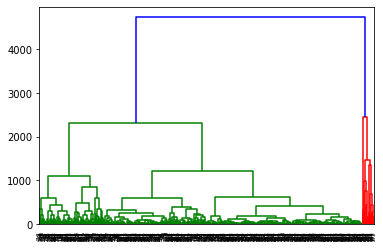

In [109]:
# Plot the dendrogram, using varieties as labels
dendrogram(mergings)
plt.show()

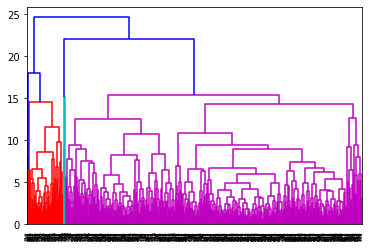

In [110]:
# analysis on the PCA 
# Calculate the linkage: mergings
mergings_pr = linkage(wisc_pr, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings_pr)
plt.show()

In [111]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 2000, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df_hclust = pd.DataFrame({'labels': labels, 'diagnosis': diagnosis})

# Create crosstab: ct
pd.crosstab(df_hclust['labels'], df_hclust['diagnosis'])

diagnosis,False,True
labels,,
1,1,110
2,356,82
3,0,19
4,0,1


In [114]:
# Use fcluster to extract labels: labels
labels_pr = fcluster(mergings_pr, 17, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df_hclust_pr = pd.DataFrame({'labels': labels_pr, 'diagnosis': diagnosis})

# Create crosstab: ct
pd.crosstab(df_hclust_pr['labels'], df_hclust_pr['diagnosis'])

diagnosis,False,True
labels,,
1,0,2
2,0,60
3,2,2
4,355,148


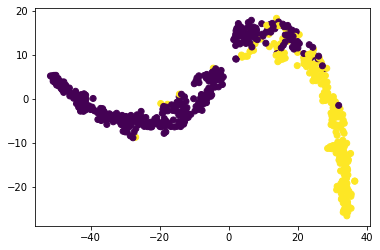

In [115]:
# Import TSNE
from sklearn.manifold import TSNE 

# Create a TSNE instance: model
model =  TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(wisc_data)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=diagnosis) 
plt.show()

In [ ]:
# we can summarise all the process as follows 

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca, kmeans)

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)